### Lecture 2 Example. A model for manufacturer production time

A manufacturer wants to investigate the time it takes (in minutes) to produce individual orders of different sizes. Data from 20 randomly selected orders is given in [https://raw.githubusercontent.com/uqglmn/sm/main/production.csv](https://raw.githubusercontent.com/uqglmn/sm/main/production.csv). The relation between the run time and run size is expected to be linear.

#### Task 1

Read the data from the file and inspect the result. Then create two vectors, $x$ and $y$, for predictor (Run Size) and response (Run Time) variables.

In [1]:
data = read.csv("https://raw.githubusercontent.com/uqglmn/sm/main/production.csv", row.names="Case")  # read data into a dataframe
head(data)  # inspect dataframe

,RunTime,RunSize
,<int>,<int>
1,195,175
2,215,189
3,243,344
4,162,88
5,185,114
6,231,338


In [2]:
x = data$RunSize
y = data$RunTime
n = length(y)     # the number of observations

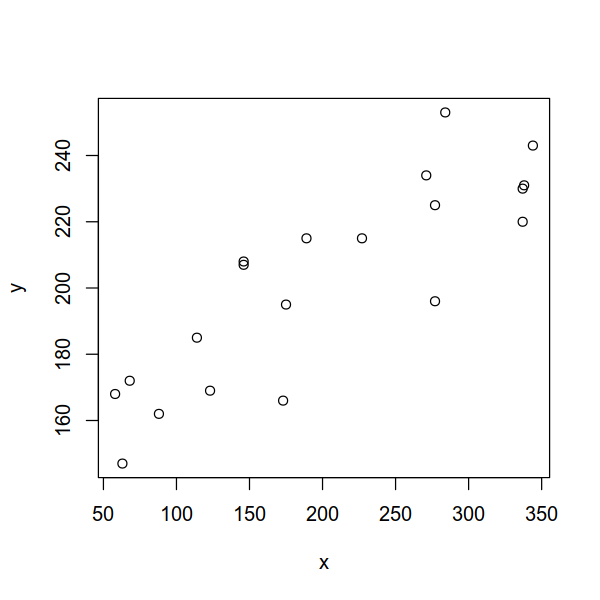

In [3]:
options(repr.plot.width=5, repr.plot.height=5) # set plot size
plot(x, y)

#### Task 2

Fit a simple linear regression model to the data. Then draw a scatter plot of the data and the fitted regression line. You will need to use the following formulas:
$$
\hat\beta_1 = \frac{s_{xy}}{s_{xx}} , \qquad \hat\beta_0 = \bar y - \hat\beta_1 \bar x
$$
where
$$
s_{xx} = \sum_{i=1}^n (x_i - \bar x)^2 , \qquad s_{xy} = \sum_{i=1}^n (x_i - \bar x)(y_i - \bar y)
$$ 

In [4]:
sxx = sum( (x - mean(x))**2 )
sxy = sum( (x - mean(x))*(y - mean(y)) )
sprintf("sxx = %.2f, sxy = %.2f", sxx, sxy) 

[1] "sxx = 191473.75, sxy = 49638.25"

In [5]:
b1hat = sxy/sxx
b0hat = mean(y) - b1hat*mean(x)
sprintf("intercept = %.2f, slope = %.2f", b0hat, b1hat)

[1] "intercept = 149.75, slope = 0.26"

**Interpretation:** on average, it takes 149.75 minutes to set up the production line and 0.26 minutes to produce a single unit.

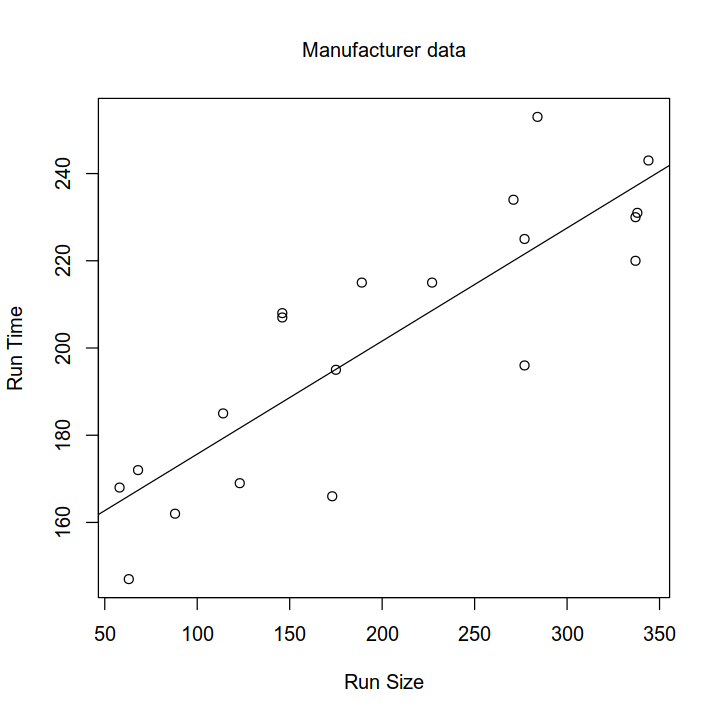

In [6]:
options(repr.plot.width=6, repr.plot.height=6)

plot(x=x, y=y,                     # scatterplot y versus x
     main="Manufacturer data",     # set main title (optional) 
     font.main = 1, cex.main=1,    # title font options (optional)
     xlab="Run Size",              # set x-label (optional)
     ylab="Run Time"               # set y-label (optional)
    )

abline(a=b0hat, b=b1hat)      # add a line with intercept a and slope b

#### Task 3

Assuming $\alpha=5\%$, test the null hypothesis $H_0 : \beta_1 = 0$ against a two-sided alternative, $H_1 = \beta_1 \ne 0$.
Interpret your result. The test statistic is

$$
T = \frac{\hat\beta_1}{{\rm se}(\hat\beta_1)} \sim t_{n-2}
$$
where
$$
{\rm se}(\hat\beta_1) = \sqrt{\hat\sigma^2/s_{xx}} , \qquad \hat\sigma^2 = \frac{1}{n-2}\sum_{i=1}^n (y_i - \hat y_i)^2
$$

In [7]:
yhat      = b0hat + b1hat * x           # find fitted values from the regression line
sigma2hat = sum( (y-yhat)**2 ) / (n-2)  # estimated variance hat-sigma-squared
seb1  = sqrt( sigma2hat/sxx )           # estimated standard error of beta-1

t1cal = abs( b1hat/seb1 )               # calculated t-value
tcrit = qt(1-0.05/2, n-2)               # critical t-value for 100% - 5%/2 = 97.5%

sprintf("The calculated t-value is %.2f. The critical t-value is %.2f", t1cal, tcrit)

[1] "The calculated t-value is 6.98. The critical t-value is 2.10"

**Answer:** The calculated value is $|t_{cal}| > t_{crit}$, hence we reject the null hypothesis.

#### Task 4

Estimate the time it takes to produce an order of size 500.

In [8]:
x0 = 500                  # order size
y0 = b0hat + b1hat * x0   # prediction

sprintf("On average, it takes %.2f minutes (%.2f hours) produce an order of size %d.", y0, y0/60, x0)

[1] "On average, it takes 279.37 minutes (4.66 hours) produce an order of size 500."

### Built-in statistical functions

The are built-in statistical functions in R that can do all the hard work for us. 
We can verify our results using these functions.


Call:
lm(formula = RunTime ~ RunSize, data = data)

Residuals:
    Min      1Q  Median      3Q     Max 
-28.597 -11.079   3.329   8.302  29.627 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 149.74770    8.32815   17.98 6.00e-13 ***
RunSize       0.25924    0.03714    6.98 1.61e-06 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 16.25 on 18 degrees of freedom
Multiple R-squared:  0.7302,	Adjusted R-squared:  0.7152 
F-statistic: 48.72 on 1 and 18 DF,  p-value: 1.615e-06


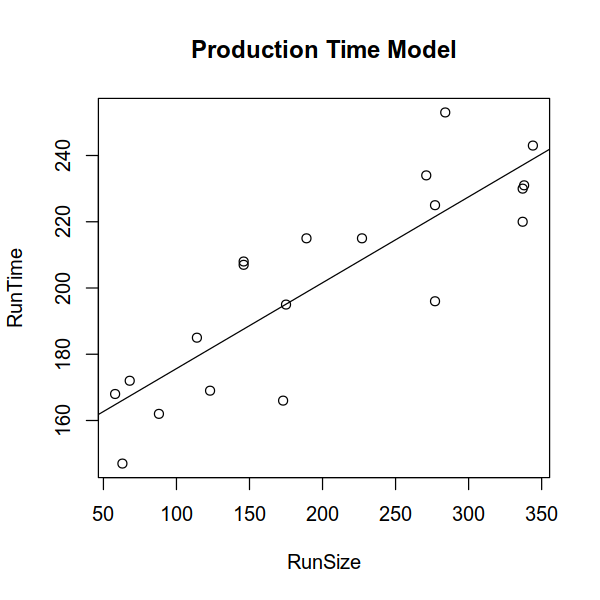

In [9]:
ProductionTimeModel = lm( RunTime ~ RunSize, data = data ) # fit a simple linear regression model
summary(ProductionTimeModel)                               # display a summary of the model

options(repr.plot.width=5, repr.plot.height=5)             # set plot size
plot(RunTime ~ RunSize, data = data, 
     main = "Production Time Model")                       # scatter plot
abline(ProductionTimeModel)                                # fitted regression line   

---